Import the necessary librarys

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn.metrics import mutual_info_score
from sklearn.model_selection import train_test_split


import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

Data Import

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lainguyn123/student-performance-factors")
print("Path to dataset files:", path)

100%|██████████| 93.9k/93.9k [00:00<00:00, 15.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/lainguyn123/student-performance-factors/versions/8


In [3]:
file_path = f"{path}/StudentPerformanceFactors.csv"
df = pd.read_csv(file_path)

### **EDA**

In [4]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [5]:
# Lower case all column names and replace blanks with _
df.columns = df.columns.str.lower().str.replace(' ','_')

In [6]:
df.dtypes

,0
hours_studied,int64
attendance,int64
parental_involvement,object
access_to_resources,object
extracurricular_activities,object
sleep_hours,int64
previous_scores,int64
motivation_level,object
internet_access,object
tutoring_sessions,int64


In [7]:
# Check for null values
df.isnull().sum()

,0
hours_studied,0
attendance,0
parental_involvement,0
access_to_resources,0
extracurricular_activities,0
sleep_hours,0
previous_scores,0
motivation_level,0
internet_access,0
tutoring_sessions,0


In [8]:
# Delete rows with missing values
df = df.dropna(subset=['teacher_quality'])
df = df.dropna(subset=['parental_education_level'])
df = df.dropna(subset=['distance_from_home'])

We want to predict a high exam score, so first we must see the spread of the exam scores.

In [9]:
df['exam_score'].describe()

,exam_score
count,6378.000000
mean,67.252117
std,3.914217
min,55.000000
25%,65.000000
50%,67.000000
75%,69.000000
max,101.000000


As the 75% mark is at 69, we will call anything 70 and above a high score.

In [10]:
df['high_score'] = (df['exam_score'] >= 70).astype(int)

In [11]:
df.describe()

,hours_studied,attendance,sleep_hours,previous_scores,tutoring_sessions,physical_activity,exam_score,high_score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,7.034964,75.066165,1.495296,2.972719,67.252117,0.247883
std,5.985460,11.550723,1.468033,14.400389,1.233984,1.028926,3.914217,0.431818
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000,0.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000,0.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000,0.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000,0.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000,1.000000


In [12]:
df.nunique()

,0
hours_studied,41
attendance,41
parental_involvement,3
access_to_resources,3
extracurricular_activities,2
sleep_hours,7
previous_scores,51
motivation_level,3
internet_access,2
tutoring_sessions,9


In [13]:
df.access_to_resources.value_counts()

,count
access_to_resources,
Medium,3204
High,1900
Low,1274


In [14]:
df.distance_from_home.value_counts()

,count
distance_from_home,
Near,3801
Moderate,1941
Far,636


In [15]:
df.teacher_quality.value_counts()

,count
teacher_quality,
Medium,3826
High,1905
Low,647


In [16]:
df.tutoring_sessions.value_counts()

,count
tutoring_sessions,
1,2111
2,1586
0,1458
3,800
4,296
5,101
6,18
7,7
8,1


In [17]:
df.motivation_level.value_counts()

,count
motivation_level,
Medium,3237
Low,1864
High,1277


In [18]:
df.high_score.value_counts()

,count
high_score,
0,4797
1,1581


In [20]:
# Frequency of the High Score variable
df.high_score.value_counts(normalize=True)

,proportion
high_score,
0,0.752117
1,0.247883


Distribution of some variables

<Axes: xlabel='hours_studied', ylabel='Count'>

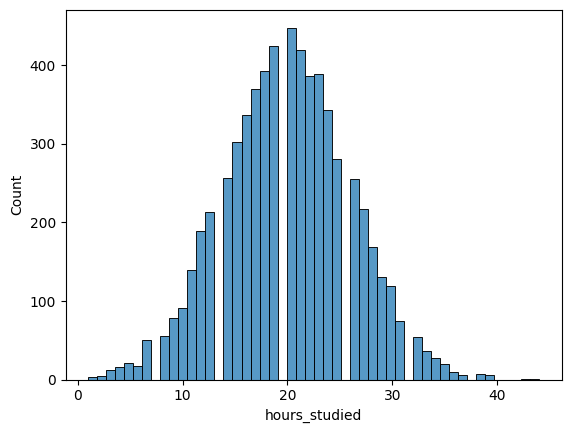

In [21]:
sns.histplot(df.hours_studied,bins = 50)

<Axes: xlabel='attendance', ylabel='Count'>

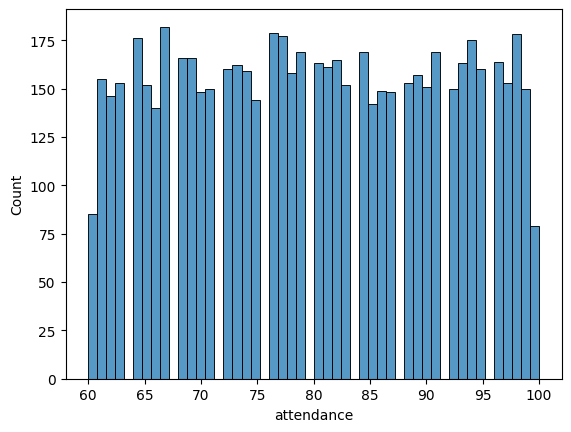

In [22]:
sns.histplot(df.attendance, bins = 50)

<Axes: xlabel='previous_scores', ylabel='Count'>

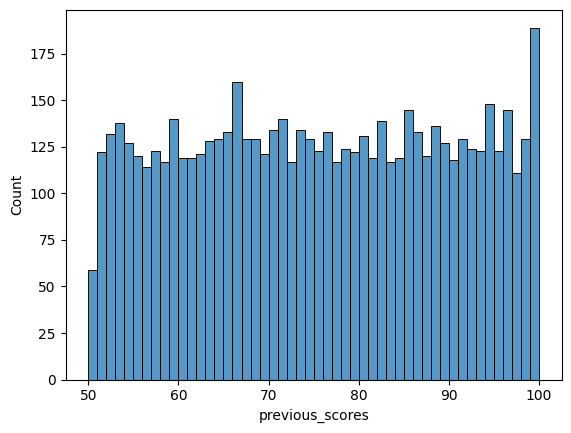

In [23]:
sns.histplot(df.previous_scores, bins = 50)

Analysis of Target Variable

In [24]:
df.dtypes

,0
hours_studied,int64
attendance,int64
parental_involvement,object
access_to_resources,object
extracurricular_activities,object
sleep_hours,int64
previous_scores,int64
motivation_level,object
internet_access,object
tutoring_sessions,int64


In [25]:
categorical = ['parental_involvement', 'access_to_resources', 'extracurricular_activities', 'motivation_level', 'internet_access','family_income','teacher_quality','school_type','peer_influence','learning_disabilities','parental_education_level','distance_from_home','gender']
numerical = ['hours_studied','attendance','sleep_hours','previous_scores', 'tutoring_sessions','physical_activity']

In [26]:
for c in categorical:
  print(c)
  df_group = df.groupby(c).high_score.agg(['mean', 'count'])
  df_group['diff']= df_group['mean'] - df.high_score.mean()
  df_group['risk'] = df_group['mean'] / df.high_score.mean()
  display(df_group)
  print()
  print()

parental_involvement


,mean,count,diff,risk
parental_involvement,,,,
High,0.320806,1836,0.072923,1.294182
Low,0.172734,1291,-0.075149,0.696837
Medium,0.236543,3251,-0.011341,0.954250




access_to_resources


,mean,count,diff,risk
access_to_resources,,,,
High,0.342632,1900,0.094748,1.382229
Low,0.155416,1274,-0.092467,0.626972
Medium,0.228464,3204,-0.019419,0.921661




extracurricular_activities


,mean,count,diff,risk
extracurricular_activities,,,,
No,0.227538,2571,-0.020345,0.917923
Yes,0.261623,3807,0.013740,1.055429




motivation_level


,mean,count,diff,risk
motivation_level,,,,
High,0.297572,1277,0.049689,1.200454
Low,0.210300,1864,-0.037583,0.848385
Medium,0.249923,3237,0.002039,1.008227




internet_access


,mean,count,diff,risk
internet_access,,,,
No,0.179381,485,-0.068502,0.723653
Yes,0.253521,5893,0.005638,1.022744




family_income


,mean,count,diff,risk
family_income,,,,
High,0.292683,1230,0.044800,1.180728
Low,0.213013,2582,-0.034870,0.859328
Medium,0.261496,2566,0.013613,1.054918




teacher_quality


,mean,count,diff,risk
teacher_quality,,,,
High,0.286614,1905,0.038731,1.156246
Low,0.194745,647,-0.053138,0.785632
Medium,0.237585,3826,-0.010298,0.958455




school_type


,mean,count,diff,risk
school_type,,,,
Private,0.254115,1944,0.006232,1.025140
Public,0.245151,4434,-0.002732,0.988978




peer_influence


,mean,count,diff,risk
peer_influence,,,,
Negative,0.187218,1330,-0.060665,0.755267
Neutral,0.238477,2495,-0.009406,0.962053
Positive,0.288680,2553,0.040797,1.164580




learning_disabilities


,mean,count,diff,risk
learning_disabilities,,,,
No,0.256392,5710,0.008509,1.034326
Yes,0.175150,668,-0.072734,0.706581




parental_education_level


,mean,count,diff,risk
parental_education_level,,,,
College,0.261991,1939,0.014107,1.056911
High School,0.213675,3159,-0.034208,0.861999
Postgraduate,0.310937,1280,0.063054,1.254370




distance_from_home


,mean,count,diff,risk
distance_from_home,,,,
Far,0.172956,636,-0.074927,0.697731
Moderate,0.219474,1941,-0.028409,0.885394
Near,0.274928,3801,0.027044,1.109101




gender


,mean,count,diff,risk
gender,,,,
Female,0.247955,2690,0.000072,1.000291
Male,0.247831,3688,-0.000053,0.999788


Feature Importance & Mutual Information

In [27]:
def calculate_mutual_info(series):
  return mutual_info_score(series, df.high_score)

In [28]:
cmi = df[categorical].apply(calculate_mutual_info)
cmi.sort_values(ascending=False)

,0
access_to_resources,1.225795e-02
parental_involvement,7.370747e-03
peer_influence,4.009825e-03
parental_education_level,3.800762e-03
distance_from_home,3.443436e-03
family_income,2.562994e-03
motivation_level,2.426459e-03
teacher_quality,2.145637e-03
learning_disabilities,1.776003e-03
internet_access,1.105778e-03


In [30]:
df[numerical].corrwith(df.high_score)

,0
hours_studied,0.372900
attendance,0.495769
sleep_hours,-0.001553
previous_scores,0.149376
tutoring_sessions,0.124466
physical_activity,0.021929


Split into Train Test and Validation Datasets

In [31]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [32]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [33]:
y_train = df_train.high_score.values
y_val = df_val.high_score.values
y_test = df_test.high_score.values

In [35]:
del df_train['high_score']
del df_train['exam_score']
del df_val['high_score']
del df_val['exam_score']
del df_test['high_score']
del df_test['exam_score']

In [213]:
sample_record = df_train.sample(1).to_dict(orient='records')[0]  # Get a single random sample
print("Student:", sample_record)

Student: {'hours_studied': 30, 'attendance': 61, 'parental_involvement': 'High', 'access_to_resources': 'High', 'extracurricular_activities': 'No', 'sleep_hours': 10, 'previous_scores': 64, 'motivation_level': 'Low', 'internet_access': 'Yes', 'tutoring_sessions': 4, 'family_income': 'Medium', 'teacher_quality': 'Medium', 'school_type': 'Public', 'peer_influence': 'Positive', 'physical_activity': 2, 'learning_disabilities': 'No', 'parental_education_level': 'Postgraduate', 'distance_from_home': 'Moderate', 'gender': 'Male'}


# **One Hot Encoding**

In [39]:
from sklearn.feature_extraction import DictVectorizer

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

dicts_val = df_val.to_dict(orient='records')
X_val = dv.transform(dicts_val)

Logistic Regression

In [42]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=1)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=1, solver='liblinear')

In [43]:
y_pred = model.predict_proba(X_val)[:,1]

In [44]:
decision = (y_pred>=0.5)

In [45]:
orig_acc = round((y_val == decision).mean(),2)
print(orig_acc)

0.98


In [58]:
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

In [47]:
roc_auc_score(y_val, y_pred).round(3)

0.978

Now fine tune the C parameter

In [48]:
for c in [0.001,0.01, 0.1, 1, 10, 100,1000]:
  model = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=1)
  model.fit(X_train, y_train)

  y_pred_c = model.predict_proba(X_val)[:,1]

  decision_c = (y_pred_c>=0.5)

  roc_auc_score(y_val, y_pred_c).round(3)

  print(c, (y_val == decision_c).mean(), roc_auc_score(y_val, y_pred_c).round(3))

0.001 0.7852664576802508 0.744
0.01 0.8456112852664577 0.876
0.1 0.9420062695924765 0.967
1 0.975705329153605 0.978
10 0.9811912225705329 0.979
100 0.9804075235109718 0.979
1000 0.9811912225705329 0.979


C of 10 looks best here


In [49]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=1)
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_val)[:,1]
decision = (y_pred>=0.5)
orig_acc = round((y_val == decision).mean(),2)
print(orig_acc)
roc_auc_score(y_val, y_pred).round(3)

0.98


0.979

Trying 5-fold and Hyperparameter Tuning next.

In [50]:
from sklearn.model_selection import KFold

In [51]:
kfold = KFold(n_splits = 5, shuffle= True, random_state = 1 )

In [52]:
train_idx, val_idx =next(kfold.split(df_full_train))

In [53]:
from tqdm.auto import tqdm

In [54]:
columns = categorical + numerical

In [55]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[columns].to_dict(orient='records')

    dv = DictVectorizer()
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

def predict(df, dv, model):
    dicts = df[columns].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [61]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5,1,5,10,100]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train_kfold = df_full_train.iloc[train_idx]
        df_val_kfold = df_full_train.iloc[val_idx]

        y_train_kfold = df_train_kfold.high_score.values
        y_val_kfold = df_val_kfold.high_score.values

        dv, model_kfold = train(df_train_kfold, y_train_kfold, C=C)
        y_pred_kfold = predict(df_val_kfold, dv,model_kfold)

        auc = roc_auc_score(y_val_kfold, y_pred_kfold)
        scores.append(auc)

    print('C = %s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))


  0%|          | 0/8 [00:00<?, ?it/s]

C = 0.001 0.747 +- 0.013
C = 0.01 0.879 +- 0.009
C = 0.1 0.974 +- 0.006
C = 0.5 0.983 +- 0.005
C = 1 0.984 +- 0.005
C = 5 0.984 +- 0.005
C = 10 0.985 +- 0.005
C = 100 0.985 +- 0.005


Here we can see that C of 10 or 100 is best as it's got the highest AUC but also a low Standard deviation. I'll keep it at 10.

Let's now look at Precision and Recall

In [199]:
model = LogisticRegression(solver='liblinear', C=10.0, max_iter=1000, random_state=1)
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_val)[:,1]

decision = (y_pred>=0.5)

orig_acc = round((y_val == decision).mean(),2)

In [200]:
scores = []


thresholds = np.linspace(0,1,101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp= (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    scores.append((t, tp, fp, fn, tn))

columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

In [201]:
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,296,980,0,0
10,0.1,288,156,8,824
20,0.2,287,102,9,878
30,0.3,287,55,9,925
40,0.4,286,31,10,949
50,0.5,280,8,16,972
60,0.6,270,2,26,978
70,0.7,253,0,43,980
80,0.8,235,0,61,980
90,0.9,191,0,105,980


In [202]:
df_scores['precision'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['recall'] = df_scores.tp / (df_scores.tp + df_scores.fn)

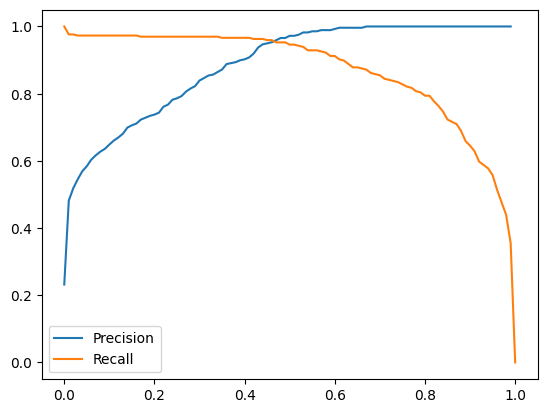

In [203]:
plt.plot(df_scores.threshold, df_scores['precision'], label = 'Precision')
plt.plot(df_scores.threshold, df_scores['recall'], label = 'Recall')
plt.legend()

In [204]:
df_scores['diff'] = np.abs(df_scores['precision'] - df_scores['recall'])

In [205]:
optimal_row = df_scores.loc[df_scores['diff'].idxmin()]

In [206]:
optimal_threshold = optimal_row['threshold']
optimal_precision = optimal_row['precision']
optimal_recall = optimal_row['recall']

print(f"Optimal Threshold: {optimal_threshold}")
print(f"Precision: {optimal_precision}")
print(f"Recall: {optimal_recall}")

Optimal Threshold: 0.46
Precision: 0.9530201342281879
Recall: 0.9594594594594594


Let's try F1 score

In [207]:
# Add an F1 score column to `df_scores`
df_scores['f1_score'] = 2 * (df_scores['precision'] * df_scores['recall']) / (df_scores['precision'] + df_scores['recall'])

# Now find the row with the maximum F1 score
optimal_row = df_scores.loc[df_scores['f1_score'].idxmax()]


In [208]:
optimal_threshold = optimal_row['threshold']
optimal_precision = optimal_row['precision']
optimal_recall = optimal_row['recall']

print(f"Optimal Threshold: {optimal_threshold}")
print(f"Precision: {optimal_precision}")
print(f"Recall: {optimal_recall}")
print(f"F1 Score: {optimal_row['f1_score']}")


Optimal Threshold: 0.53
Precision: 0.9823321554770318
Recall: 0.9391891891891891
F1 Score: 0.9602763385146804


In [210]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Define thresholds to test
thresholds = [0.30,0.40,0.45,0.50,0.60]

for thresh in thresholds:
    # Predict probabilities and apply threshold
    y_pred_prob = model.predict_proba(X_val)[:, 1]
    y_pred = (y_pred_prob >= thresh).astype(int)

    # Calculate metrics
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    print(f"Threshold: {thresh:.2f} | Precision: {precision:.2f} | Recall: {recall:.2f} | F1 Score: {f1:.2f}")


Threshold: 0.30 | Precision: 0.84 | Recall: 0.97 | F1 Score: 0.90
Threshold: 0.40 | Precision: 0.90 | Recall: 0.97 | F1 Score: 0.93
Threshold: 0.45 | Precision: 0.95 | Recall: 0.96 | F1 Score: 0.95
Threshold: 0.50 | Precision: 0.97 | Recall: 0.95 | F1 Score: 0.96
Threshold: 0.60 | Precision: 0.99 | Recall: 0.91 | F1 Score: 0.95


Here we can see that precision and F1 score is highest at 0.5 while recall is best at 0.45. But Precision takes a dip there so we'll go with 0.5.

Now building a Decision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [77]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.high_score.values
y_val = df_val.high_score.values
y_test = df_test.high_score.values

del df_train['high_score']
del df_val['high_score']
del df_test['high_score']
del df_train['exam_score']
del df_val['exam_score']
del df_test['exam_score']

In [78]:
train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

dicts_val = df_val.to_dict(orient='records')
X_val = dv.transform(dicts_val)

In [85]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [86]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- attendance <= 85.50
|   |--- hours_studied <= 27.50
|   |   |--- hours_studied <= 20.50
|   |   |   |--- tutoring_sessions <= 6.50
|   |   |   |   |--- previous_scores <= 89.50
|   |   |   |   |   |--- attendance <= 84.50
|   |   |   |   |   |   |--- previous_scores <= 75.50
|   |   |   |   |   |   |   |--- previous_scores <= 55.50
|   |   |   |   |   |   |   |   |--- hours_studied <= 11.50
|   |   |   |   |   |   |   |   |   |--- motivation_level=Medium <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- motivation_level=Medium >  0.50
|   |   |   |   |   |   |   |   |   |   |--- parental_education_level=College <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- parental_education_level=College >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- hours_studied >  11.50
|   |   |   |   |   |   |   |   |   |--- learning_dis

In [87]:
# Test the Decision Tree built
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [88]:
y_pred = dt.predict_proba(X_val)[:, 1]

In [89]:
roc_auc_score(y_val, y_pred)

0.822607556536128

In [90]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

In [91]:
# Re-train while controlling the depth
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [92]:
#The performance on validation is a lot better when we've restricted the depth
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

train: 0.8901688840122525
val: 0.8805812189740762


In [93]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- attendance <= 85.50
|   |--- hours_studied <= 27.50
|   |   |--- hours_studied <= 20.50
|   |   |   |--- class: 0
|   |   |--- hours_studied >  20.50
|   |   |   |--- class: 0
|   |--- hours_studied >  27.50
|   |   |--- attendance <= 73.50
|   |   |   |--- class: 0
|   |   |--- attendance >  73.50
|   |   |   |--- class: 1
|--- attendance >  85.50
|   |--- hours_studied <= 20.50
|   |   |--- hours_studied <= 16.50
|   |   |   |--- class: 0
|   |   |--- hours_studied >  16.50
|   |   |   |--- class: 0
|   |--- hours_studied >  20.50
|   |   |--- hours_studied <= 24.50
|   |   |   |--- class: 1
|   |   |--- hours_studied >  24.50
|   |   |   |--- class: 1



Decision Tree Parameter Tuning

In [94]:
# Tune depth
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.775
   2 -> 0.849
   3 -> 0.881
   4 -> 0.895
   5 -> 0.903
   6 -> 0.897
  10 -> 0.827
  15 -> 0.824
  20 -> 0.825
None -> 0.819


Best Depth is 5 with 4 and 6 being close.

In [95]:
# Tune Min leaf
scores = []

for depth in [4, 5, 6]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((depth, s, auc))

In [96]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [97]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.895  0.903  0.900
5                 0.897  0.906  0.893
10                0.897  0.905  0.900
15                0.896  0.903  0.904
20                0.896  0.903  0.899
100               0.892  0.900  0.905
200               0.887  0.888  0.887
500               0.867  0.867  0.867

In [98]:
df_scores.sort_values(by='auc', ascending = False)

,max_depth,min_samples_leaf,auc
9,5,5,0.905809
10,5,10,0.905467
22,6,100,0.904759
19,6,15,0.903873
11,5,15,0.903430
8,5,1,0.903366
12,5,20,0.902530
14,5,100,0.900302
16,6,1,0.900010
18,6,10,0.900009


<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

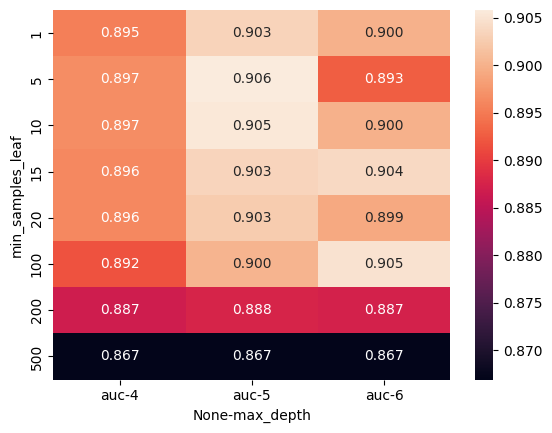

In [99]:
# Visualize in a heatmap
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [100]:
# Now building the best model from the above tuning
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)

In [101]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_pred = dt.predict_proba(X_val)[:, 1]

roc_auc_score(y_val, y_pred)

0.9058087424158852

Random Forest

In [102]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.ensemble import RandomForestClassifier

In [103]:
scores = []

# This goes from 10 to 201 adding 10 everytime
for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    scores.append((n, auc))

In [105]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

In [106]:
df_scores

,n_estimators,auc
0,10,0.932222
1,20,0.949195
2,30,0.952739
3,40,0.955121
4,50,0.955557
5,60,0.956931
6,70,0.958174
7,80,0.959010
8,90,0.959747
9,100,0.960518


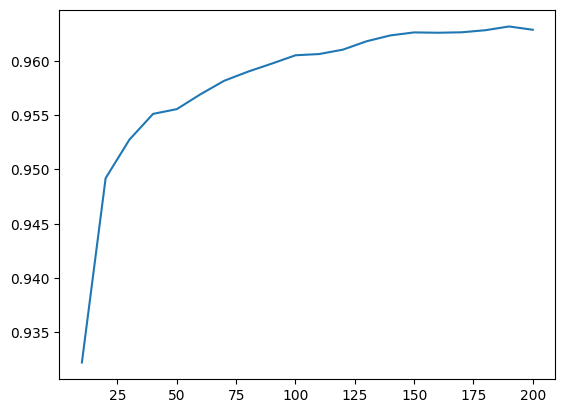

In [107]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [112]:
# test for different depths
scores = []

for d in [5, 10, 15,20,25]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [113]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

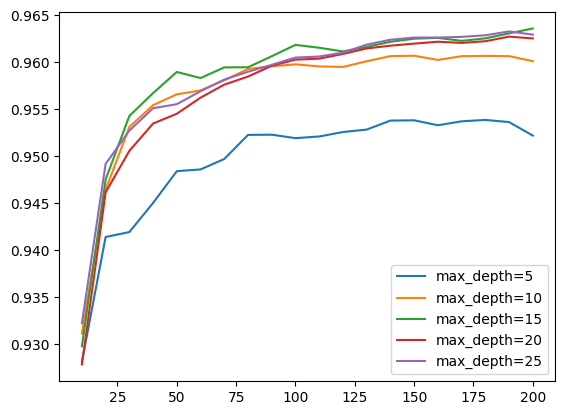

In [114]:
for d in [5, 10, 15,20,25]:
    df_subset = df_scores[df_scores.max_depth == d]

    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

In [115]:
# A Depth of 15 is best
max_depth = 15

In [116]:
# test min_sample_leaf
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [117]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [118]:
df_scores

,min_samples_leaf,n_estimators,auc
0,1,10,0.929773
1,1,20,0.947532
2,1,30,0.954301
3,1,40,0.956736
4,1,50,0.958985
...,...,...,...
95,50,160,0.950879
96,50,170,0.951051
97,50,180,0.950455
98,50,190,0.950028


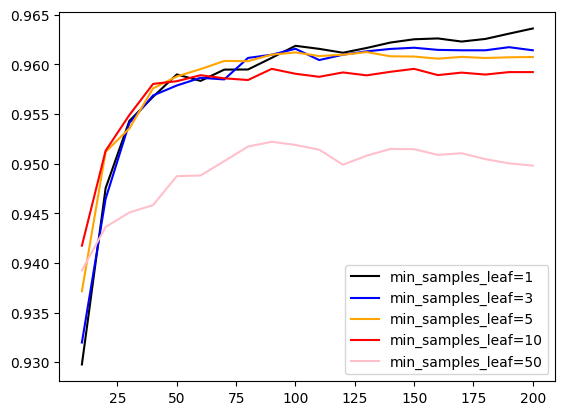

In [119]:
colors = ['black', 'blue', 'orange', 'red', 'pink']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]

    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [120]:
# Very close between min samples_leaf 1 and 3, as blue stays more consistent I will go with 3
min_samples_leaf = 3

In [121]:
# Re-train with the values we've decided
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

Compare Logistic Regression to Decision Tree and to Random Forrest

In [212]:
# Train Logistic Regression Model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=10, max_iter=1000, random_state=1)
log_reg.fit(X_train, y_train)

# Train Decision Tree Model
dt_model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)
dt_model.fit(X_train, y_train)

# Train Random Forest Model
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=15,
                            min_samples_leaf=3,
                            random_state=1)
rf.fit(X_train, y_train)

# Get Probabilities and Predictions for Each Model

# Logistic Regression Predictions
y_prob_log_reg = log_reg.predict_proba(X_val)[:, 1]  # Probability of positive class
y_pred_log_reg = (y_prob_log_reg >= 0.5).astype(int)

# Decision Tree Predictions
y_prob_dt = dt_model.predict_proba(X_val)[:, 1]  # Probability of positive class
y_pred_dt = (y_prob_dt >= 0.5).astype(int)

# Random Forest Predictions
y_prob_rf = rf.predict_proba(X_val)[:, 1]  # Probability of positive class
y_pred_rf = (y_prob_rf >= 0.5).astype(int)


# Calculate Metrics

# Logistic Regression Metrics
precision_log_reg = precision_score(y_val, y_pred_log_reg)
recall_log_reg = recall_score(y_val, y_pred_log_reg)
f1_log_reg = f1_score(y_val, y_pred_log_reg)
roc_auc_log_reg = roc_auc_score(y_val, y_prob_log_reg)

# Decision Tree Metrics
precision_dt = precision_score(y_val, y_pred_dt)
recall_dt = recall_score(y_val, y_pred_dt)
f1_dt = f1_score(y_val, y_pred_dt)
roc_auc_dt = roc_auc_score(y_val, y_prob_dt)

# XGBoost Metrics
precision_rf = precision_score(y_val, y_pred_rf)
recall_rf = recall_score(y_val, y_pred_rf)
f1_rf = f1_score(y_val, y_pred_rf)
roc_auc_rf = roc_auc_score(y_val, y_pred_rf)

# Display Results

print("Logistic Regression:")
print(f"  Precision: {precision_log_reg:.4f}")
print(f"  Recall:    {recall_log_reg:.4f}")
print(f"  F1 Score:  {f1_log_reg:.4f}")
print(f"  ROC AUC:   {roc_auc_log_reg:.4f}")

print("\nDecision Tree:")
print(f"  Precision: {precision_dt:.4f}")
print(f"  Recall:    {recall_dt:.4f}")
print(f"  F1 Score:  {f1_dt:.4f}")
print(f"  ROC AUC:   {roc_auc_dt:.4f}")

print("\nRandom Forrest:")
print(f"  Precision: {precision_rf:.4f}")
print(f"  Recall:    {recall_rf:.4f}")
print(f"  F1 Score:  {f1_rf:.4f}")
print(f"  ROC AUC:   {roc_auc_rf:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
  Precision: 0.9658
  Recall:    0.9527
  F1 Score:  0.9592
  ROC AUC:   0.9793

Decision Tree:
  Precision: 0.7010
  Recall:    0.7128
  F1 Score:  0.7069
  ROC AUC:   0.9054

Random Forrest:
  Precision: 0.9324
  Recall:    0.6520
  F1 Score:  0.7674
  ROC AUC:   0.8189


### **Logisitc Regression is the best model!**